In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import seaborn as sns

from astropy.table import Table

Populating the interactive namespace from numpy and matplotlib


# PM errors vs intrinsic velocity dispersion

In [2]:
meter_to_pc = 3.24078e-17
sec_to_yr = 3.17098e-8
rad_to_deg = 360. / 2. / np.pi


vel_dis_input = 5.    # km/s
vel_dis = vel_dis_input * meter_to_pc    # kpc/s
vel_dis /= sec_to_yr    # kpc/yr

dists = np.linspace(50, 500)    # kpc

dvel = vel_dis / dists    # rad/yr
dvel *= rad_to_deg    # deg/yr
dvel *= 3600. * 1e3   # mas/yr


Text(0, 0.5, 'velocity dispersion (mas/yr)')

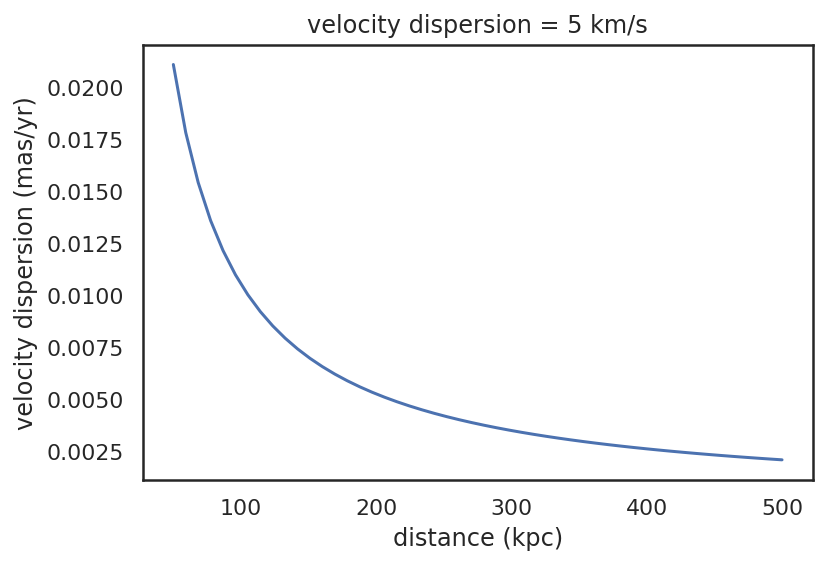

In [3]:
sns.set(style="white", color_codes=True, font_scale=1)
fig, ax = plt.subplots()

sns.lineplot(x=dists, y=dvel)

ax.set_title('velocity dispersion = %d km/s' % int(vel_dis_input))
ax.set_xlabel('distance (kpc)')
ax.set_ylabel('velocity dispersion (mas/yr)')

# PMs from Table C2 in Gaia Collaboration 2018
Table data was downloaded from arxiv with source

In [4]:
t = Table.read('pm-data/Gaia2018_table_C2.tex')
for col in t.colnames:
    print(col)

Name
$\alpha$
$\delta$
$\varpi$
$\epsilon_\varpi $
$\mu_{\alpha^*}$
$\epsilon_{\mu_{\alpha^*}}$
$\mu_\delta$
$\epsilon_{\mu_\delta}$
C$_{\varpi,\mu_\alpha}$
C$_{\varpi,\mu_\delta}$
C$_{\mu_\alpha,\mu_\delta}$
nMemb
$G_{lim}$


In [5]:
newcol = ['satellite', 
          'ra_deg',
          'dec_deg',
          'parallax_mas',
          'err_parallax_mas',
          'pmra',
          'err_pmra',
          'pmdec',
          'err_pmdec',
          'cor_plx_pmra',
          'cor_plx_pmdec',
          'cor_pmra_pmdec',
          'N_member',
          'G_lim_mag',
         ]

for i,col in enumerate(t.colnames):
    print('%20s    <-    %s' % (newcol[i], col))

           satellite    <-    Name
              ra_deg    <-    $\alpha$
             dec_deg    <-    $\delta$
        parallax_mas    <-    $\varpi$
    err_parallax_mas    <-    $\epsilon_\varpi $
                pmra    <-    $\mu_{\alpha^*}$
            err_pmra    <-    $\epsilon_{\mu_{\alpha^*}}$
               pmdec    <-    $\mu_\delta$
           err_pmdec    <-    $\epsilon_{\mu_\delta}$
        cor_plx_pmra    <-    C$_{\varpi,\mu_\alpha}$
       cor_plx_pmdec    <-    C$_{\varpi,\mu_\delta}$
      cor_pmra_pmdec    <-    C$_{\mu_\alpha,\mu_\delta}$
            N_member    <-    nMemb
           G_lim_mag    <-    $G_{lim}$


In [6]:
df_gaia = t.to_pandas()
df_gaia = df_gaia.rename(columns={col: newcol[i] for i,col in enumerate(t.colnames)})

df_gaia['satellite'] = df_gaia['satellite'].str.replace('Fnx', 'Fornax')
df_gaia['satellite'] = df_gaia['satellite'].str.replace('Dra', 'Draco')
df_gaia['satellite'] = df_gaia['satellite'].str.replace('Car', 'Carina')
df_gaia['satellite'] = df_gaia['satellite'].str.replace('U Min', 'Ursa Minor')
df_gaia['satellite'] = df_gaia['satellite'].str.replace('Sext', 'Sextans I')
df_gaia['satellite'] = df_gaia['satellite'].str.replace('Leo~I', 'Leo I')
df_gaia['satellite'] = df_gaia['satellite'].str.replace('Leo~II', 'Leo II')
df_gaia['satellite'] = df_gaia['satellite'].str.replace('Sgr', 'Sagittarius')
df_gaia['satellite'] = df_gaia['satellite'].str.replace('Scl', 'Sculptor')
df_gaia['satellite'] = df_gaia['satellite'].str.replace('Boo~I', 'Bootes I')

df_gaia

,satellite,ra_deg,dec_deg,parallax_mas,err_parallax_mas,pmra,err_pmra,pmdec,err_pmdec,cor_plx_pmra,cor_plx_pmdec,cor_pmra_pmdec,N_member,G_lim_mag
0,Fornax,39.9971,-34.4492,-0.054,0.002,0.376,0.003,-0.413,0.003,0.16,-0.46,-0.09,7722,19.9
1,Draco,260.0517,57.9153,-0.052,0.005,-0.019,0.009,-0.145,0.010,-0.18,0.12,-0.08,422,19.5
2,Carina,100.4029,-50.9661,-0.015,0.005,0.495,0.015,0.143,0.014,-0.00,0.02,-0.08,257,19.1
3,Ursa Minor,227.2854,67.2225,-0.039,0.006,-0.182,0.010,0.074,0.008,-0.01,-0.31,-0.34,925,19.8
4,Sextans I,153.2625,-1.6147,-0.102,0.023,-0.496,0.025,0.077,0.020,0.28,-0.10,-0.45,205,19.7
5,Leo I,152.1171,12.3064,-0.214,0.065,-0.097,0.056,-0.091,0.047,0.29,-0.30,-0.51,174,19.9
6,Leo II,168.3700,22.1517,-0.001,0.037,-0.064,0.057,-0.210,0.054,-0.18,-0.24,0.05,116,20.0
7,Sagittarius,283.8313,-30.5453,0.003,0.001,-2.692,0.001,-1.359,0.001,-0.17,0.21,0.09,23109,18.0
8,Sculptor,15.0392,-33.7092,-0.013,0.004,0.082,0.005,-0.131,0.004,0.17,0.15,0.23,1592,19.5
9,Bootes I,210.0250,14.5000,-0.069,0.024,-0.459,0.041,-1.064,0.029,0.01,0.11,0.16,115,19.7


# PMs from Table 3 in Pace et al 2019
Table data was downloaded from arxiv with source

In [7]:
t = Table.read('pm-data/Pace2019_table_PM.tex')
for col in t.colnames:
    print(col)

\colhead{Satellite}
\colhead{$\sum p_i$}
\colhead{${\rm N}$($p_i > 0.1$)}
\colhead{${\rm N}_{\rm expected}$}
\colhead{${\rm N}(r<3\times r_h)$}
\colhead{$\overline{\mu_{\alpha }\cos{\delta}}$}
\colhead{$\overline{\mu_{\delta}}$ }
\colhead{$C_{\overline{\pmra} \times \overline{\pmdec}}$ }


In [8]:
newcol = ['satellite', 
          'prob_membership',
          'Nstar_(prob>0.1)',
          'Nexpected',
          'N(r<3rh)',
          'pmra',
          'pmdec',
          'correlation',
         ]

for i,col in enumerate(t.colnames):
    print('%20s    <-    %s' % (newcol[i], col))

           satellite    <-    \colhead{Satellite}
     prob_membership    <-    \colhead{$\sum p_i$}
    Nstar_(prob>0.1)    <-    \colhead{${\rm N}$($p_i > 0.1$)}
           Nexpected    <-    \colhead{${\rm N}_{\rm expected}$}
            N(r<3rh)    <-    \colhead{${\rm N}(r<3\times r_h)$}
                pmra    <-    \colhead{$\overline{\mu_{\alpha }\cos{\delta}}$}
               pmdec    <-    \colhead{$\overline{\mu_{\delta}}$ }
         correlation    <-    \colhead{$C_{\overline{\pmra} \times \overline{\pmdec}}$ }


In [9]:
df_pace = t.to_pandas()
df_pace = df_pace.rename(columns={col: newcol[i] for i,col in enumerate(t.colnames)})
df_pace.sample(2)

,satellite,prob_membership,Nstar_(prob>0.1),Nexpected,N(r<3rh),pmra,pmdec,correlation
5,Tucana III,44.83,74,$42 \pm 6$,115,$-0.03_{-0.04}^{+0.04}$,$-1.65_{-0.04}^{+0.04}$,-0.38
0,Eridanus II,18.44,21,$20 \pm 5$,16,$0.16_{-0.24}^{+0.24}$,$0.15_{-0.26}^{+0.26}$,-0.27


In [10]:
df_pace['pmra_ori'] = df_pace['pmra']
df_pace['pmdec_ori'] = df_pace['pmdec']

df_pace['pmra'] = df_pace['pmra'].str.split('_', n=1, expand=True)[0]
df_pace['pmra'] = df_pace['pmra'].str.replace('$', '').astype(float)

df_pace['pmdec'] = df_pace['pmdec'].str.split('_', n=1, expand=True)[0]
df_pace['pmdec'] = df_pace['pmdec'].str.replace('$', '').astype(float)

df_pace.sample(2)

,satellite,prob_membership,Nstar_(prob>0.1),Nexpected,N(r<3rh),pmra,pmdec,correlation,pmra_ori,pmdec_ori
12,Tucana IV,16.42,32,$29 \pm 5$,100,0.63,-1.71,-0.30,$0.63_{-0.22}^{+0.25}$,$-1.71_{-0.24}^{+0.20}$
13,Horologium II,4.13,5,$8 \pm 3$,5,0.82,-0.04,0.07,$0.82_{-0.40}^{+0.45}$,$-0.04_{-0.71}^{+0.62}$


# Concatenate dataframes

In [11]:
df = pd.concat([df_gaia[['satellite', 'pmra', 'pmdec']], df_pace[['satellite', 'pmra', 'pmdec']]])
df

,satellite,pmra,pmdec
0,Fornax,0.376,-0.413
1,Draco,-0.019,-0.145
2,Carina,0.495,0.143
3,Ursa Minor,-0.182,0.074
4,Sextans I,-0.496,0.077
5,Leo I,-0.097,-0.091
6,Leo II,-0.064,-0.210
7,Sagittarius,-2.692,-1.359
8,Sculptor,0.082,-0.131
9,Bootes I,-0.459,-1.064
